# Hafsah Anibaba

# The Spark Foundation internship
# #GRIPFEB21
# Task #3 :- Exploratory Data Analysis on Sample Superstore dataset

### Tasks
* To find  weak areas where you can work to make more proﬁt.  
* To find business problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
group = data[['Region','State','Ship Mode','Segment','Category','Sub-Category','Sales','Profit']]

In [7]:
# Total Sales,Profit made in each region
group.groupby('Region' ).sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


Text(0.5, 1.0, 'Total Profit made in each region')

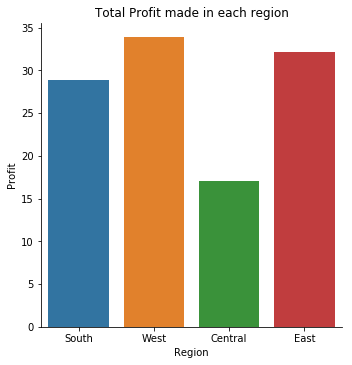

In [8]:
sns.catplot(x='Region',y ='Profit', data = group, kind = 'bar', ci = None)
plt.title('Total Profit made in each region')

### The  profit in the central region is less compared to other regions

Text(0.5, 1.0, 'Total Profit made in each Category with respect to shipmode')

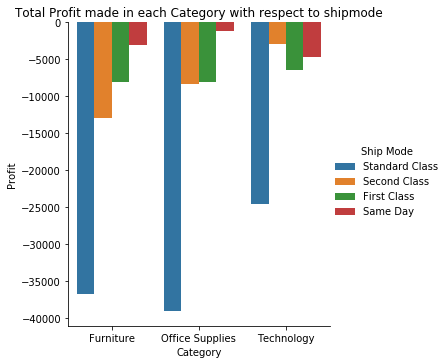

In [9]:
sns.catplot(x ='Category', y= 'Profit', hue = 'Ship Mode', data = data[['Ship Mode','Profit','Category']][data['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Category with respect to shipmode')

Text(0.5, 1.0, 'Total Profit made in each Segment with respect to shipmode')

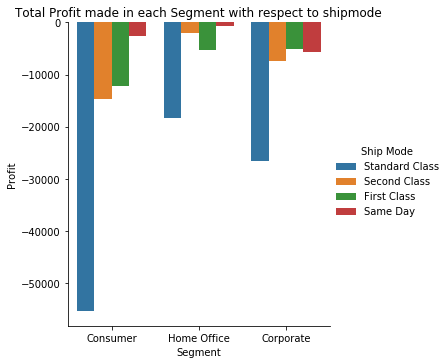

In [10]:
sns.catplot(x ='Segment', y= 'Profit', hue = 'Ship Mode', data = data[['Ship Mode','Profit','Segment']][data['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Segment with respect to shipmode')

In [11]:
# Total Sales,Profit made in each region
state_profit = group.groupby('State', as_index=False).sum().sort_values('Profit', ascending = False)

In [12]:
state_profit .T

,3,30,45,20,44,12,9,15,21,6,...,35,8,1,40,4,31,11,36,33,41
State,California,New York,Washington,Michigan,Virginia,Indiana,Georgia,Kentucky,Minnesota,Delaware,...,Oregon,Florida,Arizona,Tennessee,Colorado,North Carolina,Illinois,Pennsylvania,Ohio,Texas
Sales,457688,310876,138641,76269.6,70636.7,53555.4,49095.8,36591.7,29863.1,27451.1,...,17431.1,89473.7,35282,30661.9,32108.1,55603.2,80166.1,116512,78258.1,170188
Profit,76381.4,74038.5,33402.7,24463.2,18598,18382.9,16250,11199.7,10823.2,9977.37,...,-1190.47,-3399.3,-3427.92,-5341.69,-6527.86,-7490.91,-12607.9,-15560,-16971.4,-25729.4


In [13]:
#states with  loss
loss = state_profit[state_profit['Profit'] < 0]
loss

,State,Sales,Profit
35,Oregon,17431.1500,-1190.4705
8,Florida,89473.7080,-3399.3017
1,Arizona,35282.0010,-3427.9246
40,Tennessee,30661.8730,-5341.6936
4,Colorado,32108.1180,-6527.8579
31,North Carolina,55603.1640,-7490.9122
11,Illinois,80166.1010,-12607.8870
36,Pennsylvania,116511.9140,-15559.9603
33,Ohio,78258.1360,-16971.3766
41,Texas,170188.0458,-25729.3563


Text(0.5, 1.0, ' States with total Profit as loss')

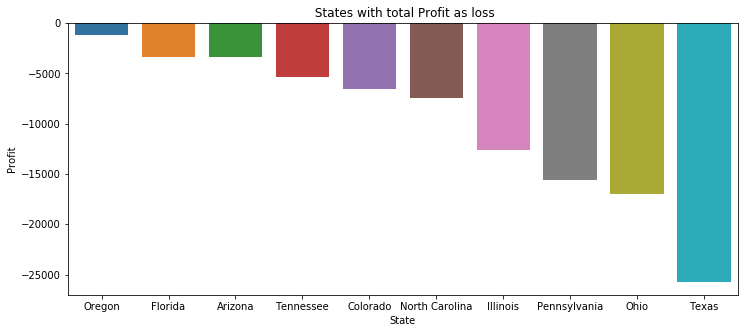

In [14]:
plt.figure(figsize = (12,5))
sns.barplot(x='State',y ='Profit', data = loss);
plt.title(' States with total Profit as loss')

* ##### More loss is made in Texas, Ohio, Pennsylvania, Illinois they have a total loss above 10000

### Texas

In [15]:
Texas = data[data['State'] == 'Texas'][['Ship Mode','City','Profit','Sales','Category','Sub-Category']]
Texas_sort = Texas.groupby('City', as_index = False).sum().sort_values('Profit', ascending = False)
Texas_sort.T

,20,8,34,44,6,25,11,14,41,51,...,43,2,52,10,53,28,46,16,48,27
City,Fort Worth,Brownsville,Lubbock,Port Arthur,Beaumont,Haltom City,Cedar Hill,Coppell,Pearland,The Colony,...,Plano,Amarillo,Tyler,Carrollton,Waco,Huntsville,Round Rock,Dallas,San Antonio,Houston
Profit,298.733,202.072,147.139,105.776,59.1164,51.9558,42.8316,41.4892,39.4131,31.6586,...,-383.055,-387.968,-443.709,-470.214,-520.103,-843.426,-1183.43,-2846.53,-7299.05,-10153.5
Sales,6602.71,1292.23,592.564,737.053,472.116,269.328,122.376,135.936,494.996,142.16,...,3530.37,3773.06,347.206,2200.65,606.107,6710.62,4854.05,20131.9,21843.5,64504.8


In [16]:
# Top 15 cities in Texas with higest total of loss
Texas_loss = Texas_sort.tail(15)
Texas_loss

,City,Profit,Sales
19,El Paso,-179.9007,3546.0640
9,Bryan,-213.7116,616.6560
42,Pharr,-237.5528,1540.7080
3,Arlington,-254.3886,5847.7720
40,Pasadena,-340.1050,2477.4580
43,Plano,-383.0554,3530.3746
2,Amarillo,-387.9683,3773.0628
52,Tyler,-443.7086,347.2060
10,Carrollton,-470.2139,2200.6460
53,Waco,-520.1034,606.1072


Text(0.5, 1.0, ' Cities in Texas with total Profit as loss')

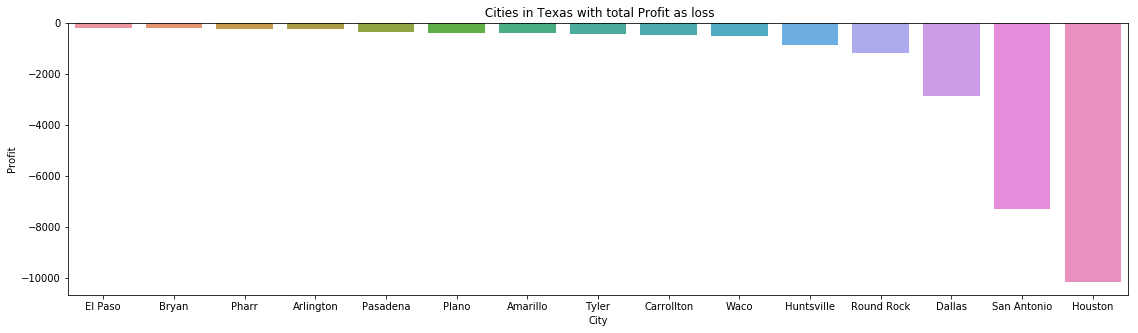

In [17]:
plt.figure(figsize = (19,5))
sns.barplot(x='City',y ='Profit', data = Texas_loss);
plt.title(' Cities in Texas with total Profit as loss')

* ###### In Texas, Houston, San-Antonio and Dallas have greater loss compared to other cities

### Houston

In [18]:
Houston_sort = Texas[Texas['City'] == 'Houston'].groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
Houston_loss = Houston_sort[Houston_sort['Profit'] < 0]
Houston_loss

,Sub-Category,Profit,Sales
15,Supplies,-14.9247,134.9600
14,Storage,-218.8031,4830.2640
16,Tables,-625.0306,3845.9750
9,Furnishings,-704.8210,960.6880
5,Chairs,-954.5291,9633.7710
11,Machines,-999.6828,8023.5420
4,Bookcases,-1120.4223,8742.7804
1,Appliances,-2887.3111,1114.9900
3,Binders,-6894.6390,4301.9420


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in Houston')

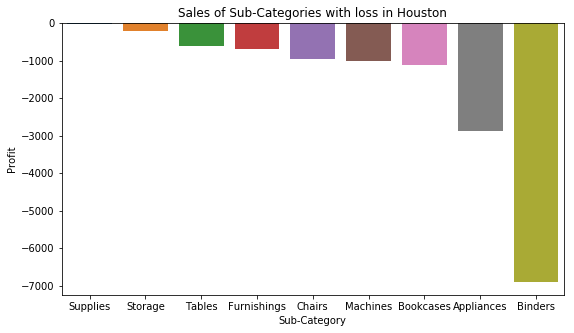

In [19]:
plt.figure(figsize = (9,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Houston_loss);
plt.title('Sales of Sub-Categories with loss in Houston')

* ##### In Houston, more loss is made in the sales of Binders and Appliances  

### San-Antonio

In [20]:
San_Antonio_sort = Texas[Texas['City'] == 'San Antonio'].groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
San_Antonio_loss = San_Antonio_sort[San_Antonio_sort['Profit'] < 0]
San_Antonio_loss

,Sub-Category,Profit,Sales
7,Furnishings,-40.6482,58.280
12,Storage,-68.8271,446.072
4,Chairs,-124.1707,2876.489
13,Tables,-250.4696,2220.477
9,Machines,-1406.3105,8847.402
1,Appliances,-1647.2214,646.064
3,Binders,-4204.7558,2489.648


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in San-Antonio')

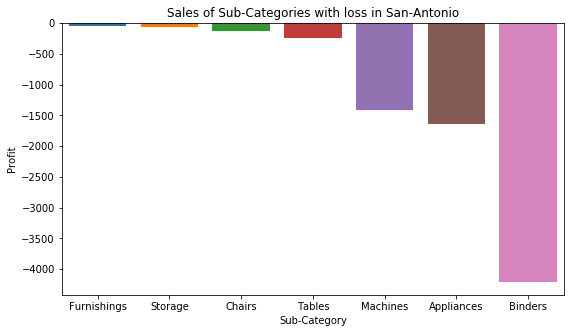

In [21]:
plt.figure(figsize = (9,5))
sns.barplot(x='Sub-Category',y ='Profit', data = San_Antonio_loss);
plt.title('Sales of Sub-Categories with loss in San-Antonio')

* ###### In San-Antonio, more loss is made in the sales of Binders, Appliances and Machines


In [22]:
Dallas_sort = Texas[Texas['City'] == 'Dallas'].groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
Dallas_loss = Dallas_sort[Dallas_sort['Profit'] < 0]
Dallas_loss

,Sub-Category,Profit,Sales
14,Supplies,-3.0876,216.3360
5,Chairs,-234.1860,1639.3020
15,Tables,-417.5043,2478.5950
1,Appliances,-462.4856,181.4520
4,Bookcases,-620.1858,2329.4352
8,Furnishings,-751.2971,859.5360
3,Binders,-1566.7102,1028.0080


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in Dallas')

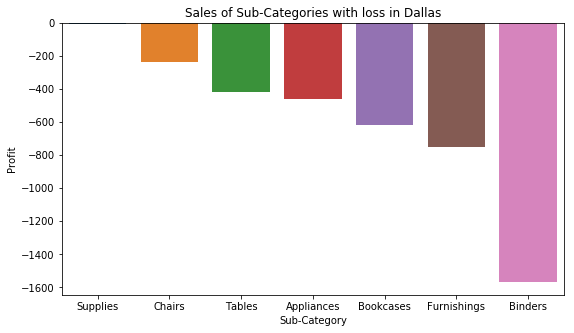

In [23]:
plt.figure(figsize = (9,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Dallas_loss);
plt.title('Sales of Sub-Categories with loss in Dallas')

* ###### In Dallas, more loss is made in the sales of Binders

In [24]:
Texas_sort = Texas.groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
Texas_sort.T

,13,12,6,0,7,2,10,8,14,15,16,4,5,11,9,1,3
Sub-Category,Phones,Paper,Copiers,Accessories,Envelopes,Art,Labels,Fasteners,Storage,Supplies,Tables,Bookcases,Chairs,Machines,Furnishings,Appliances,Binders
Profit,3222.46,2422.97,1629.96,1105.85,848.176,316.354,200.402,80.7357,-763.705,-837.28,-2216.68,-2391.14,-2515.65,-2666.84,-3312.68,-6147.22,-14705.1
Sales,28589.6,6983.46,5639.87,11328.6,2530.65,2369.53,583.6,332.464,15723.6,4516.76,15760.7,14493.5,26572.4,19546.2,3766.72,2407.81,9042.68


Text(0.5, 1.0, 'Total Profit made in sales of Sub-Categories in Texas')

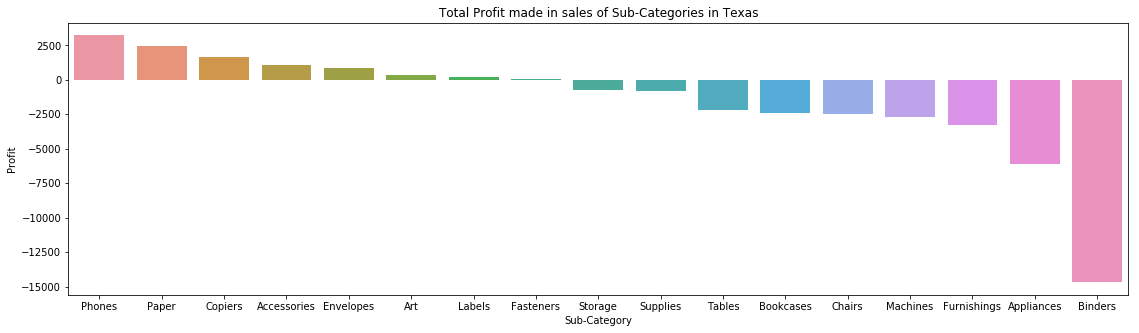

In [25]:
plt.figure(figsize = (19,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Texas_sort);
plt.title('Total Profit made in sales of Sub-Categories in Texas')

Text(0.5, 1.0, 'Total Profit made in each Segment with respect to shipmode in Texas')

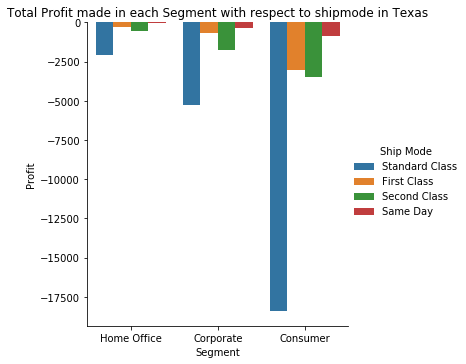

In [26]:
Texas = data[data['State'] == 'Texas']
sns.catplot(x ='Segment', y= 'Profit', hue = 'Ship Mode', data = Texas[['Ship Mode','Profit','Segment']][Texas['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Segment with respect to shipmode in Texas')

## Ohio

In [27]:
Ohio = data[data['State'] == 'Ohio'][['Ship Mode','City','Profit','Sales','Category','Sub-Category']]
Ohio_sort = Ohio.groupby('City', as_index = False).sum().sort_values('Profit', ascending = False)
Ohio_sort.T

,2,1,20,9,7,16,10,11,5,18,...,6,15,14,4,3,23,17,21,19,13
City,Cincinnati,Bowling Green,Parma,Grove City,Elyria,Mason,Hamilton,Kent,Cuyahoga Falls,Mentor,...,Dublin,Marion,Lorain,Columbus,Cleveland,Troy,Medina,Springfield,Newark,Lancaster
Profit,175.337,149.945,31.0618,13.1952,-1.3984,-4.2352,-9.385,-11.3007,-12.5752,-123.274,...,-351.305,-544.653,-632.923,-729.505,-848.008,-874.587,-1343.04,-1420.16,-2292.41,-7149.62
Sales,1611.98,1865.57,3879.76,123.588,1.824,94.264,328.224,346.302,29.094,693.13,...,2379.16,3010.99,2015.11,15900.8,6346.18,3180.53,2477.72,5613.17,8128.07,8202.62


In [28]:
# Top 15 cities in Texas with higest total of loss
Ohio_loss = Ohio_sort.tail(20)
Ohio_loss.T

,7,16,10,11,5,18,8,0,12,22,6,15,14,4,3,23,17,21,19,13
City,Elyria,Mason,Hamilton,Kent,Cuyahoga Falls,Mentor,Fairfield,Akron,Lakewood,Toledo,Dublin,Marion,Lorain,Columbus,Cleveland,Troy,Medina,Springfield,Newark,Lancaster
Profit,-1.3984,-4.2352,-9.385,-11.3007,-12.5752,-123.274,-129.288,-186.636,-336.608,-339.997,-351.305,-544.653,-632.923,-729.505,-848.008,-874.587,-1343.04,-1420.16,-2292.41,-7149.62
Sales,1.824,94.264,328.224,346.302,29.094,693.13,3077.7,2729.99,1756.32,4466.05,2379.16,3010.99,2015.11,15900.8,6346.18,3180.53,2477.72,5613.17,8128.07,8202.62


Text(0.5, 1.0, ' Cities in ohio with total Profit as loss')

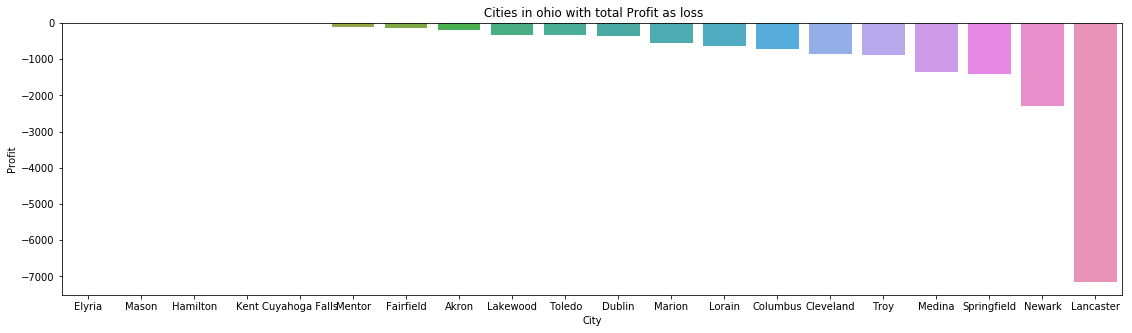

In [29]:
plt.figure(figsize = (19,5))
sns.barplot(x='City',y ='Profit', data = Ohio_loss);
plt.title(' Cities in ohio with total Profit as loss')

* ##### In Ohio, More loss is made in Lancaster

#### Lancaster

In [30]:
Lancaster_sort = Ohio[Ohio['City'] == 'Lancaster'].groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
Lancaster_loss = Lancaster_sort[Lancaster_sort['Profit'] < 0]
Lancaster_loss

,Sub-Category,Profit,Sales
4,Chairs,-1.2178,85.246
9,Storage,-71.1862,423.552
10,Tables,-103.9882,215.148
8,Phones,-253.4337,1169.694
3,Binders,-330.1421,489.504
6,Machines,-6599.9780,4499.985


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in Lancaster')

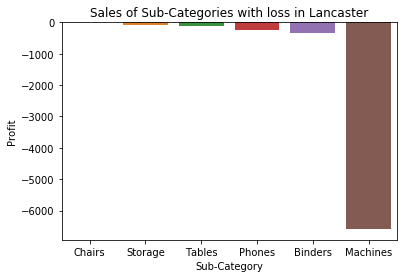

In [31]:
sns.barplot(x='Sub-Category',y ='Profit', data = Lancaster_loss);
plt.title('Sales of Sub-Categories with loss in Lancaster')

* ###### In Lancaster, more loss is made in the sales of Machines

Text(0.5, 1.0, 'Total Profit made in sales of Sub-Categories in Ohio')

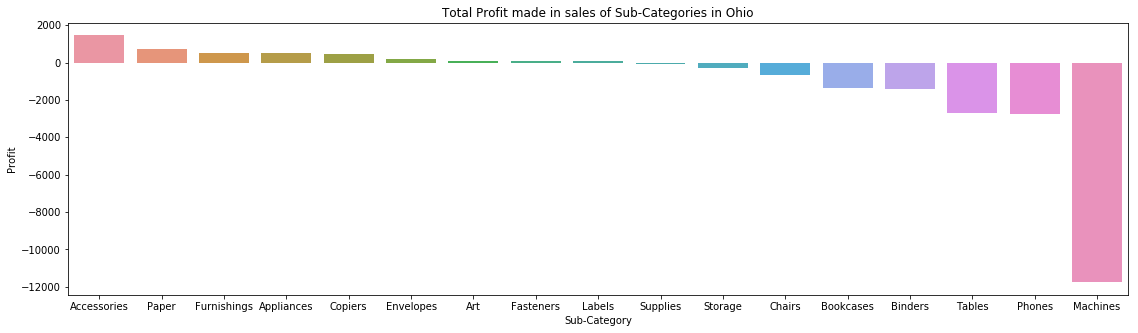

In [32]:
Ohio_sort = Ohio.groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
plt.figure(figsize = (19,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Ohio_sort);
plt.title('Total Profit made in sales of Sub-Categories in Ohio')

Text(0.5, 1.0, 'Total Profit made in each Segment with respect to shipmode in Ohio')

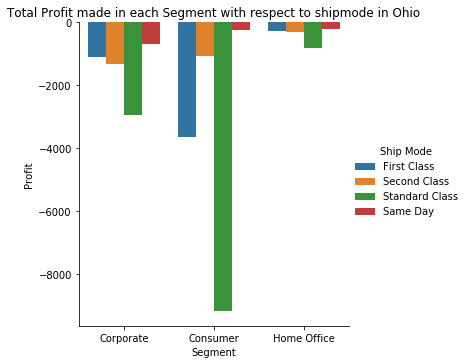

In [33]:
Ohio = data[data['State'] == 'Ohio']
sns.catplot(x ='Segment', y= 'Profit', hue = 'Ship Mode', data = Ohio[['Ship Mode','Profit','Segment']][Ohio['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Segment with respect to shipmode in Ohio')

### Pennsylvania

In [34]:
Pennsylvania = data[data['State'] == 'Pennsylvania'][['Ship Mode','City','Profit','Sales','Category','Sub-Category']]
Pennsylvania_sort = Pennsylvania.groupby('City', as_index = False).sum()
Pennsylvania_sort.T

,0,1,2,3,4,5,6,7
City,Allentown,Altoona,Bethlehem,Chester,Lancaster,Philadelphia,Reading,York
Profit,-226.45,-1.1835,-1003.1,48.3578,-168.888,-13837.8,-268.764,-102.169
Sales,853.252,20.451,1689.63,1968.48,1211.39,109077,873.712,817.978


In [35]:
# for cities with losses higher than 100
Loss = Pennsylvania_sort[Pennsylvania_sort['Profit'] < 0].sort_values('Profit')
Loss = Loss[Loss['Profit'] < -100]
Loss

,City,Profit,Sales
5,Philadelphia,-13837.7674,109077.013
2,Bethlehem,-1003.0958,1689.634
6,Reading,-268.7642,873.712
0,Allentown,-226.4504,853.252
4,Lancaster,-168.8876,1211.395
7,York,-102.1692,817.978


Text(0.5, 1.0, ' Cities in Pennsylvania with total Profit as loss')

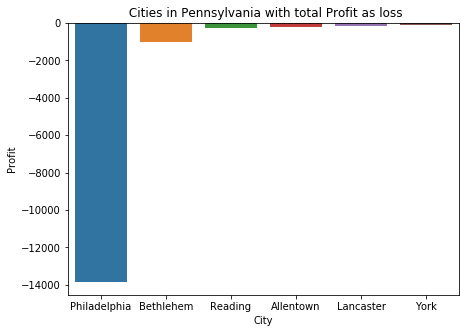

In [36]:
plt.figure(figsize = (7,5))
sns.barplot(x='City',y ='Profit', data = Loss );
plt.title(' Cities in Pennsylvania with total Profit as loss')

* ##### In Pennsylvania, more loss is made in Philadelphia

In [37]:
Philadelphia = Pennsylvania[Pennsylvania['City'] == 'Philadelphia']
Philadelphia_Loss = Philadelphia.groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
Philadelphia_Loss = Philadelphia_Loss[Philadelphia_Loss['Profit'] < 0]
Philadelphia_Loss

,Sub-Category,Profit,Sales
14,Storage,-1163.9182,10631.168
15,Supplies,-1351.4897,6229.480
5,Chairs,-1963.3730,17007.970
11,Machines,-2219.2456,2133.717
4,Bookcases,-2568.1413,4531.345
16,Tables,-2588.7538,8052.186
3,Binders,-3385.2340,4552.161
13,Phones,-3555.0398,19432.182


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in Philadelphia')

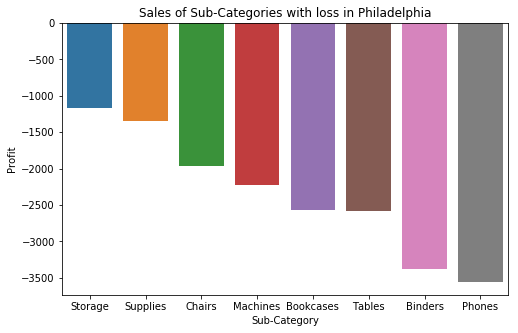

In [38]:
plt.figure(figsize = (8,5))
sns.barplot(x ='Sub-Category', y ='Profit', data = Philadelphia_Loss, ci = None)
plt.title('Sales of Sub-Categories with loss in Philadelphia')

### In Philadelphia, more loss is made on phones and binders

Text(0.5, 1.0, 'Total Profit made in sales of Sub-Categories in Pennsylvania')

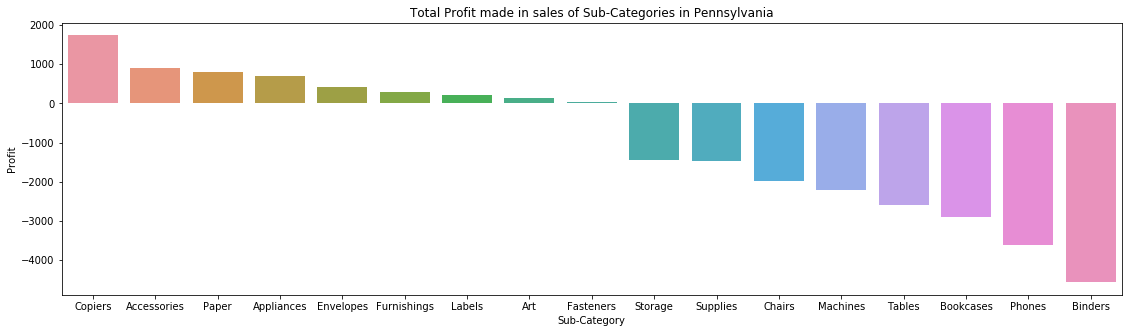

In [39]:
Pennsylvania_sort = Pennsylvania.groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
plt.figure(figsize = (19,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Pennsylvania_sort);
plt.title('Total Profit made in sales of Sub-Categories in Pennsylvania')

Text(0.5, 1.0, 'Total Profit made in each Segment with respect to shipmode in Pennsylvania')

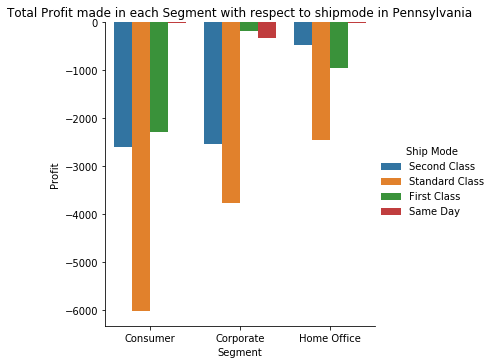

In [40]:
Pennsylvania = data[data['State'] == 'Pennsylvania']
sns.catplot(x ='Segment', y= 'Profit', hue = 'Ship Mode', data = Pennsylvania[['Ship Mode','Profit','Segment']][Pennsylvania['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Segment with respect to shipmode in Pennsylvania')

### Illinois

In [41]:
Illinois = data[data['State'] == 'Illinois'][['Ship Mode','City','Profit','Sales','Category','Sub-Category']]
Illinois_sort = Illinois.groupby('City', as_index = False).sum().sort_values('Profit', ascending = False)
Illinois_sort.T

,12,28,20,25,22,15,0,19,3,30,...,10,23,31,9,29,2,21,26,1,7
City,Evanston,Saint Charles,Orland Park,Quincy,Palatine,Glenview,Arlington Heights,Oak Park,Bolingbrook,Tinley Park,...,Des Plaines,Park Ridge,Wheeling,Decatur,Skokie,Bloomington,Oswego,Rockford,Aurora,Chicago
Profit,411.884,216.64,67.992,49.1019,23.2624,13.8579,1.2348,1.0192,-4.661,-8.9152,...,-236.767,-238.45,-293.318,-311.033,-346.87,-432.128,-536.128,-1149.51,-1894.72,-6654.57
Sales,1753.8,1388.71,339.96,330.284,116.312,158.376,14.112,10.192,218.308,22.288,...,1493.21,685,737.142,3169.47,568.832,963.94,321.978,3166.23,7572.97,48539.5


In [42]:
# Top 15 cities in Texas with higest total of loss
Illinois_loss = Illinois_sort.tail(20)
Illinois_loss.T

,5,8,24,4,18,14,17,16,6,11,10,23,31,9,29,2,21,26,1,7
City,Carol Stream,Danville,Peoria,Buffalo Grove,Normal,Freeport,Naperville,Highland Park,Champaign,Elmhurst,Des Plaines,Park Ridge,Wheeling,Decatur,Skokie,Bloomington,Oswego,Rockford,Aurora,Chicago
Profit,-39.8683,-69.3952,-72.7587,-89.6478,-110.023,-127.45,-146.532,-169.941,-182.352,-212.132,-236.767,-238.45,-293.318,-311.033,-346.87,-432.128,-536.128,-1149.51,-1894.72,-6654.57
Sales,1305.81,43.372,501.48,831.399,366.744,215.82,1288.3,2035.1,151.96,891.628,1493.21,685,737.142,3169.47,568.832,963.94,321.978,3166.23,7572.97,48539.5


Text(0.5, 1.0, ' Cities in Illinois with total Profit as loss')

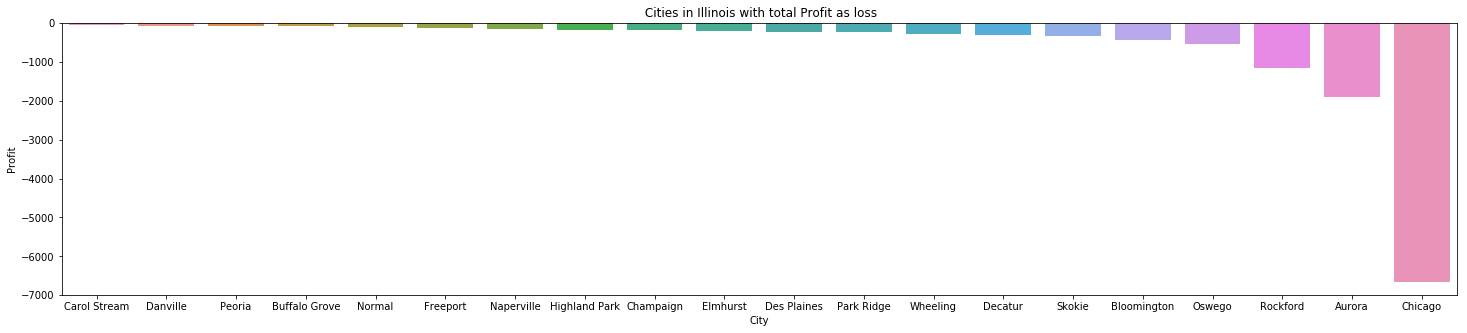

In [43]:
plt.figure(figsize = (25,5))
sns.barplot(x='City',y ='Profit', data = Illinois_loss);
plt.title(' Cities in Illinois with total Profit as loss')

* ##### In Illinois, More loss is made in Chicago

In [44]:
Chicago = Illinois[Illinois['City'] == 'Chicago'].groupby('Sub-Category', as_index = False).sum()
Chicago = Chicago[Chicago['Profit'] < 0].sort_values('Profit')
Chicago

,Sub-Category,Profit,Sales
3,Binders,-4911.3644,3168.330
1,Appliances,-2224.2865,877.214
16,Tables,-1446.9305,2204.015
9,Furnishings,-1130.5897,1351.444
5,Chairs,-627.9509,6738.613
4,Bookcases,-310.9952,2201.150
14,Storage,-110.0504,6555.640


Text(0.5, 1.0, 'Sales of Sub-Categories with loss in Chicago')

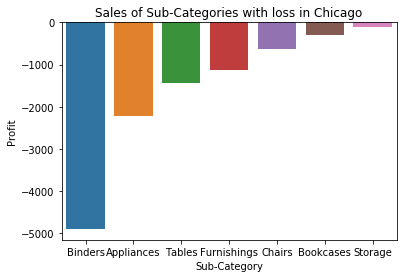

In [45]:
sns.barplot(x = 'Sub-Category', y = 'Profit', data = Chicago);
plt.title('Sales of Sub-Categories with loss in Chicago')

* ##### In Chicago, more loss is made on binders

Text(0.5, 1.0, 'Total Profit made in sales of Sub-Categories in Illinois')

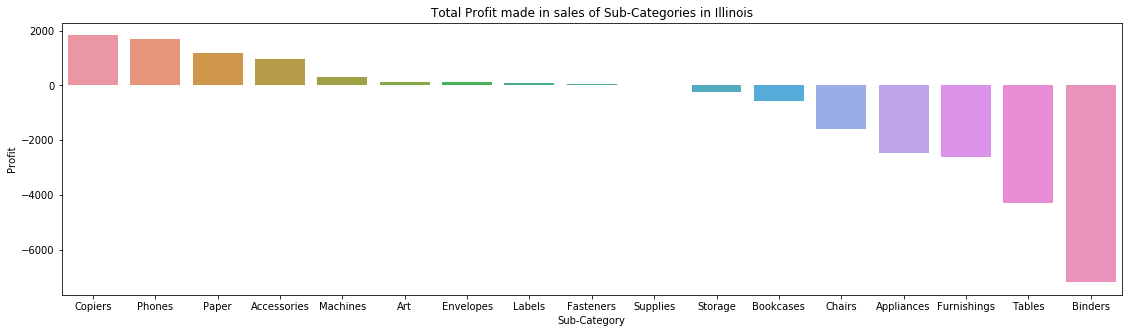

In [46]:
Illinois_sort = Illinois.groupby('Sub-Category', as_index = False).sum().sort_values('Profit', ascending = False)
plt.figure(figsize = (19,5))
sns.barplot(x='Sub-Category',y ='Profit', data = Illinois_sort);
plt.title('Total Profit made in sales of Sub-Categories in Illinois')

Text(0.5, 1.0, 'Total Profit made in each Segment with respect to shipmode in Illinois')

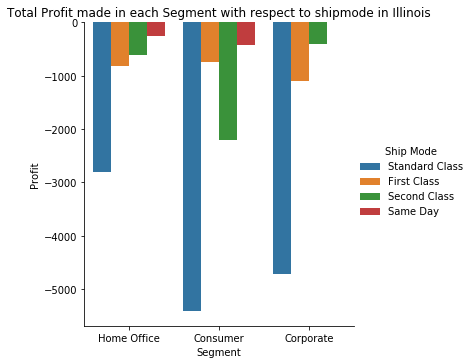

In [47]:
Illinois = data[data['State'] == 'Illinois']
sns.catplot(x ='Segment', y= 'Profit', hue = 'Ship Mode', data = Illinois[['Ship Mode','Profit','Segment']][Illinois['Profit'] < 0], kind ='bar', ci =None, estimator = sum)
plt.title('Total Profit made in each Segment with respect to shipmode in Illinois')

### Conclusion:-
* The areas that needs to be focused on are Houston, San-Antonio and Dallas in Texas, Lancaster in Ohio, Philadelphia in Pennsylvania, and Chicago in Illinois
* Less profit is made in the Central region, it's a weaker region and more work needs tbe done to make more profit
* More loss is made in office supplies category transported on Standard class ship mode
* More loss is made in Consumer segment transported on Standard class ship mode
* Less profit is made on Ship mode
* In Houston, more loss is made in the sales of Binders and Appliances
* In San-Antonio, more loss is made in the sales of Binders, Appliances and Machines
* In Dallas, more loss is made in the sales of Binders
* In Texas more profit is made in the sales of phones and loss is made in the sales of Binders
* In Lancaster, more loss is made in the sales of Machines
* In Ohio more profit is made in the sales of Accessories and loss is made in the sales of Machines
* In Philadelphia, more loss is made in the sales of  phones and binders
* In Pennsylvania more profit is made in the sales of Copiers and loss is made in the sales of Binders
* In Chicago, more loss is made in the sales of  binders
* In Illinois more profit is made in the sales of Copiers and loss is made in the sales of Binders
